In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = np.load('ORL_faces.npz') 
trainX = data['trainX']  
trainY = data['trainY']

testX = data['testX']
testY = data['testY']

trainX = trainX.reshape((240, 112, -1))
testX = testX.reshape((160, 112, -1))

trainX /= 255.
testX /= 255.

E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

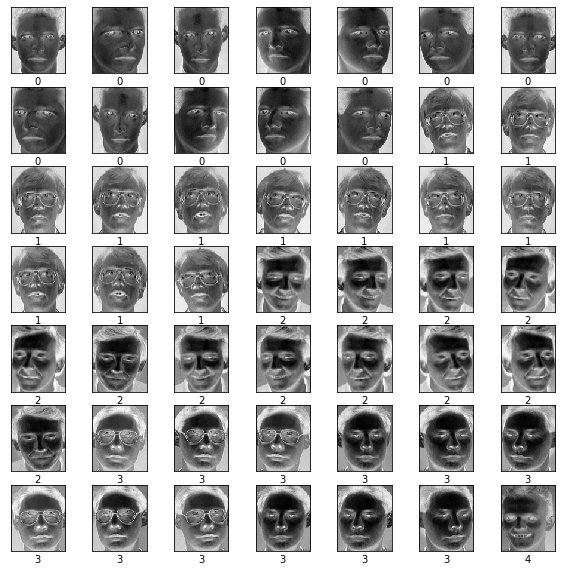

In [6]:
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(112, 92)),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
log = model.fit(trainX, trainY, epochs=25)

Epoch 1/25
240/240 [==============================] - 0s 1ms/sample - loss: 5.2363 - acc: 0.0542
Epoch 2/25
240/240 [==============================] - 0s 179us/sample - loss: 3.2375 - acc: 0.1083
Epoch 3/25
240/240 [==============================] - 0s 179us/sample - loss: 2.6627 - acc: 0.2583
Epoch 4/25
240/240 [==============================] - 0s 175us/sample - loss: 2.2490 - acc: 0.3500
Epoch 5/25
240/240 [==============================] - 0s 187us/sample - loss: 1.9178 - acc: 0.5250
Epoch 6/25
240/240 [==============================] - 0s 179us/sample - loss: 1.4885 - acc: 0.5708
Epoch 7/25
240/240 [==============================] - 0s 175us/sample - loss: 1.1742 - acc: 0.7833
Epoch 8/25
240/240 [==============================] - 0s 175us/sample - loss: 1.0827 - acc: 0.7375
Epoch 9/25
240/240 [==============================] - 0s 179us/sample - loss: 0.8560 - acc: 0.8083
Epoch 10/25
240/240 [==============================] - 0s 179us/sample - loss: 0.6998 - acc: 0.8708
Epoch 11/25

In [9]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

print('Test accuracy:', test_acc)

160/160 - 0s - loss: 0.3801 - acc: 0.9125
Test accuracy: 0.9125


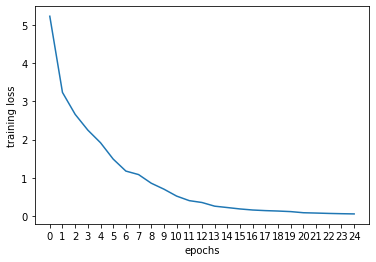

In [12]:
y = log.history['loss']
x = list(range(len(y)))
plt.plot(x, y)
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

In [21]:
print(log.history)

{'loss': [5.236257139841715, 3.237487030029297, 2.6627012888590493, 2.248988485336304, 1.91782488822937, 1.4885394732157389, 1.174201456705729, 1.082706884543101, 0.8559836467107137, 0.6998305757840474, 0.5181803623835246, 0.3985757311185201, 0.34997304280598956, 0.2536448448896408, 0.21761566201845806, 0.1806778848171234, 0.15299798796574274, 0.13701654175917308, 0.1260286529858907, 0.11112537334362665, 0.08145571649074554, 0.07306602895259857, 0.06341489156087239, 0.056121778984864555, 0.05051882366339366], 'acc': [0.054166667, 0.108333334, 0.25833333, 0.35, 0.525, 0.5708333, 0.78333336, 0.7375, 0.80833334, 0.87083334, 0.95, 0.96666664, 0.9583333, 1.0, 0.9916667, 0.99583334, 0.99583334, 1.0, 0.99583334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


dict_keys(['loss', 'acc'])


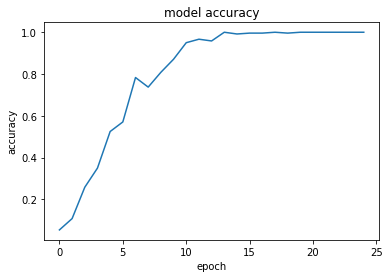

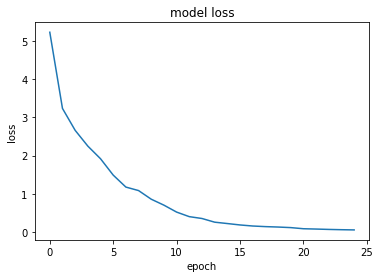

In [26]:
# list all data in history
print(log.history.keys())
# summarize history for accuracy
plt.plot(log.history['acc'])
#plt.plot(log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(log.history['loss'])
#plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()